## G2M insight for Cab Investment firm ( Must for all Specialization) 

The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

    Review the Source Documentation
    Understand the field names and data types
    Identify relationships across the files
    Field/feature transformations
    Determine which files should be joined versus which ones should be appended
    Create master data and explain the relationship
    Identify and remove duplicates
    Perform other analysis like NA value and outlier detection


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/Cab_Data.csv")

In [3]:
df2 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/City.csv")

In [4]:
df3 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/Transaction_ID.csv")

In [5]:
df4 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/Customer_ID.csv")

In [6]:
df5 = pd.read_csv("/home/equipo/Documents/Job/courses/DataGlacier/DataSets/US Holiday Dates (2004-2021).csv")

In [7]:
df1.shape


(359392, 7)

In [8]:
df2.shape

(20, 3)

In [9]:
df3.shape


(440098, 3)

In [10]:
df4.shape

(49171, 4)

In [11]:
df5.shape

(342, 6)

In [12]:
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [13]:
df2.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [14]:
df3.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [15]:
df4.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [16]:
df5.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [17]:
df5

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008
...,...,...,...,...,...,...
337,2006-04-16,Western Easter,Sunday,4,16,2006
338,2017-04-16,Western Easter,Sunday,4,16,2017
339,2014-04-20,Western Easter,Sunday,4,20,2014
340,2019-04-21,Western Easter,Sunday,4,21,2019


In [18]:
df1.info()
df2.info()
df3.info()
df4.info()
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 

## There are zero missing values in the datasets.

pd.to_datetime(arg) : Convert argument to datetime.

This function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.

In [19]:
# Convert 'Date' to datetime format
df5['Date'] = pd.to_datetime(df5['Date'])
print(df5["Date"])
# Add a 'Holiday' column with value 1 for all entries
df5['Holiday'] = [1]*df5.shape[0]

# Keep only 'Date' and 'Holiday' columns
df5 = df5[['Date', 'Holiday']]

# Drop duplicates (important to assign the result)
df5= df5.drop_duplicates()
print(df5)

0     2004-07-04
1     2005-07-04
2     2006-07-04
3     2007-07-04
4     2008-07-04
         ...    
337   2006-04-16
338   2017-04-16
339   2014-04-20
340   2019-04-21
341   2011-04-24
Name: Date, Length: 342, dtype: datetime64[ns]
          Date  Holiday
0   2004-07-04        1
1   2005-07-04        1
2   2006-07-04        1
3   2007-07-04        1
4   2008-07-04        1
..         ...      ...
333 2012-04-08        1
335 2009-04-12        1
336 2020-04-12        1
337 2006-04-16        1
340 2019-04-21        1

[336 rows x 2 columns]


In [20]:
print(df5.nunique().sort_values(ascending=False))

Date       336
Holiday      1
dtype: int64


## This code sets the origin to December 30, 1899, because Excel's serial date system starts from January 1, 1900, but due to a known bug, it treats 1900 as a leap year.


In [21]:
# Assuming 'df' is your DataFrame and 'Date of Travel' is the column with serial numbers
df1['Date of Travel'] = pd.to_datetime(df1['Date of Travel'], origin='1899-12-30', unit='D')
df1 = df1.rename(columns = {'Date of Travel': 'Date'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date            359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


# Prepare Cab_data for merging
df1['Date of Travel'] = pd.to_datetime(df1['Date of Travel'])
df1 = df1.rename(columns = {'Date of Travel': 'Date'})
df1.info()

In [22]:
df1['Date'].unique()

<DatetimeArray>
['2016-01-08 00:00:00', '2016-01-06 00:00:00', '2016-01-02 00:00:00',
 '2016-01-07 00:00:00', '2016-01-03 00:00:00', '2016-01-12 00:00:00',
 '2016-01-11 00:00:00', '2016-01-10 00:00:00', '2016-01-09 00:00:00',
 '2016-01-05 00:00:00',
 ...
 '2018-12-21 00:00:00', '2018-12-24 00:00:00', '2018-12-20 00:00:00',
 '2018-12-25 00:00:00', '2018-12-29 00:00:00', '2018-12-28 00:00:00',
 '2018-12-31 00:00:00', '2018-12-27 00:00:00', '2018-12-30 00:00:00',
 '2018-12-26 00:00:00']
Length: 1095, dtype: datetime64[ns]

##  Check for duplicates based on all columns

## There are no duplicates column.

In [23]:
#merged_df.drop_duplicates()

In [24]:
# Merged all data into one data set for convenience.
merged_df = df1.merge(df3, on= 'Transaction ID').merge(df4, on ='Customer ID').merge(df2, on = 'City').merge(df5, how="left",on = 'Date')
merged_df['Holiday'] = merged_df['Holiday'].fillna(0)
missing_value = 0
for column in merged_df.columns :
    missing_value += merged_df[column].isna().sum() + merged_df[column].isnull().sum()
print('Merged dataset has {} entries , {} features and {} missing values'.format(merged_df.shape[0] ,merged_df.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(merged_df.dtypes))

Merged dataset has 359392 entries , 15 features and 0 missing values

Feature's datatypes

Transaction ID                 int64
Date                  datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                         object
Holiday                      float64
dtype: object


# Merged all data into one data set for convenience.

# Merge using a left join so you retain all rows from df1
merged_df = df1.merge(df3, on= 'Transaction ID').merge(df4, on ='Customer ID').merge(df2, on = 'City').merge(df5, how="left",on = 'Date')
# Fill NaN values in 'Holiday' column with 0 (i.e., not a holiday)

merged_df['Holiday'] = merged_df['Holiday'].fillna(0).astype(int)
missing_value = 0
for column in merged_df.columns :
    missing_value += merged_df[column].isna().sum() + merged_df[column].isnull().sum()
print('Merged dataset has {} entries , {} features and {} missing values'.format(merged_df.shape[0] ,merged_df.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(merged_df.dtypes))


In [25]:
merged_df.columns

Index(['Transaction ID', 'Date', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users',
       'Holiday'],
      dtype='object')

## Perform other analysis like NA value and outlier detection

In [26]:
merged_df.describe()

,Transaction ID,Date,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Holiday
count,3.593920e+05,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,2017-08-17 01:37:55.042293760,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,0.051877
min,1.000001e+07,2016-01-02 00:00:00,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,0.000000
25%,1.011081e+07,2016-11-23 00:00:00,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,0.000000
50%,1.022104e+07,2017-09-10 00:00:00,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,0.000000
75%,1.033094e+07,2018-05-12 00:00:00,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,0.000000
max,1.044011e+07,2018-12-31 00:00:00,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,1.000000
std,1.268058e+05,NaN,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,0.221778


In [27]:
merged_df['Date']

0        2016-01-08
1        2016-01-06
2        2016-01-02
3        2016-01-07
4        2016-01-03
            ...    
359387   2018-01-08
359388   2018-01-04
359389   2018-01-05
359390   2018-01-05
359391   2018-01-02
Name: Date, Length: 359392, dtype: datetime64[ns]

In [28]:
master_data = merged_df

In [29]:
master_data.dtypes

Transaction ID                 int64
Date                  datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                         object
Holiday                      float64
dtype: object

In [30]:
print(master_data.nunique().sort_values(ascending=False))

Transaction ID        359392
Price Charged          99176
Customer ID            46148
Income (USD/Month)     22725
Cost of Trip           16291
Date                    1095
KM Travelled             874
Age                       48
City                      19
Population                19
Users                     19
Company                    2
Payment_Mode               2
Gender                     2
Holiday                    2
dtype: int64


In [32]:
master_data['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [33]:
# Derive some interested features for later analysis
master_data['Year'] = master_data['Date'].dt.year
master_data['Month'] = master_data['Date'].dt.month
master_data['Profit'] = master_data['Price Charged'] - master_data['Cost of Trip']
master_data['Profit_Rate'] = ((master_data['Price Charged'] - master_data['Cost of Trip'])/master_data['Cost of Trip'])*100
master_data['Profit_per_KM'] = master_data['Profit']/ master_data['KM Travelled']
#master_data['User_Ratio'] = master_data['Users']/master_data['Population']*100

master_data.info()

master_data = master_data.drop(master_data.columns[1], axis=1)
print(master_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date                359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [34]:
master_data['Year'].unique()

array([2016, 2017, 2018], dtype=int32)

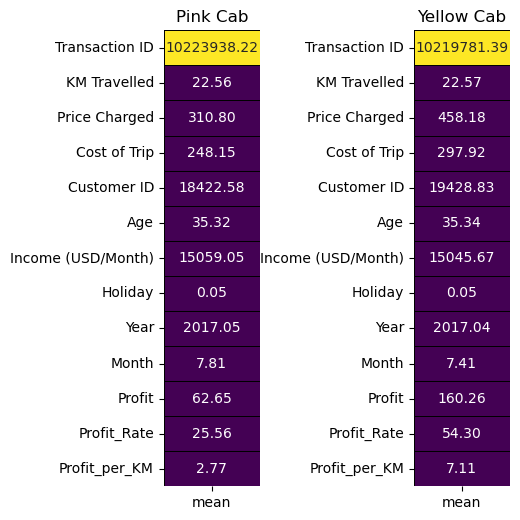

In [35]:
Pink = master_data[master_data['Company'] == 'Pink Cab'].describe().T
Yellow = master_data[master_data['Company'] == 'Yellow Cab'].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(Pink[['mean']],annot = True,cmap = 'viridis',linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Pink Cab');

plt.subplot(1,2,2)
sns.heatmap(Yellow[['mean']],annot = True,cmap = 'viridis',linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Yellow Cab');

fig.tight_layout(pad = 0)

## Exploratory Data Analysis

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

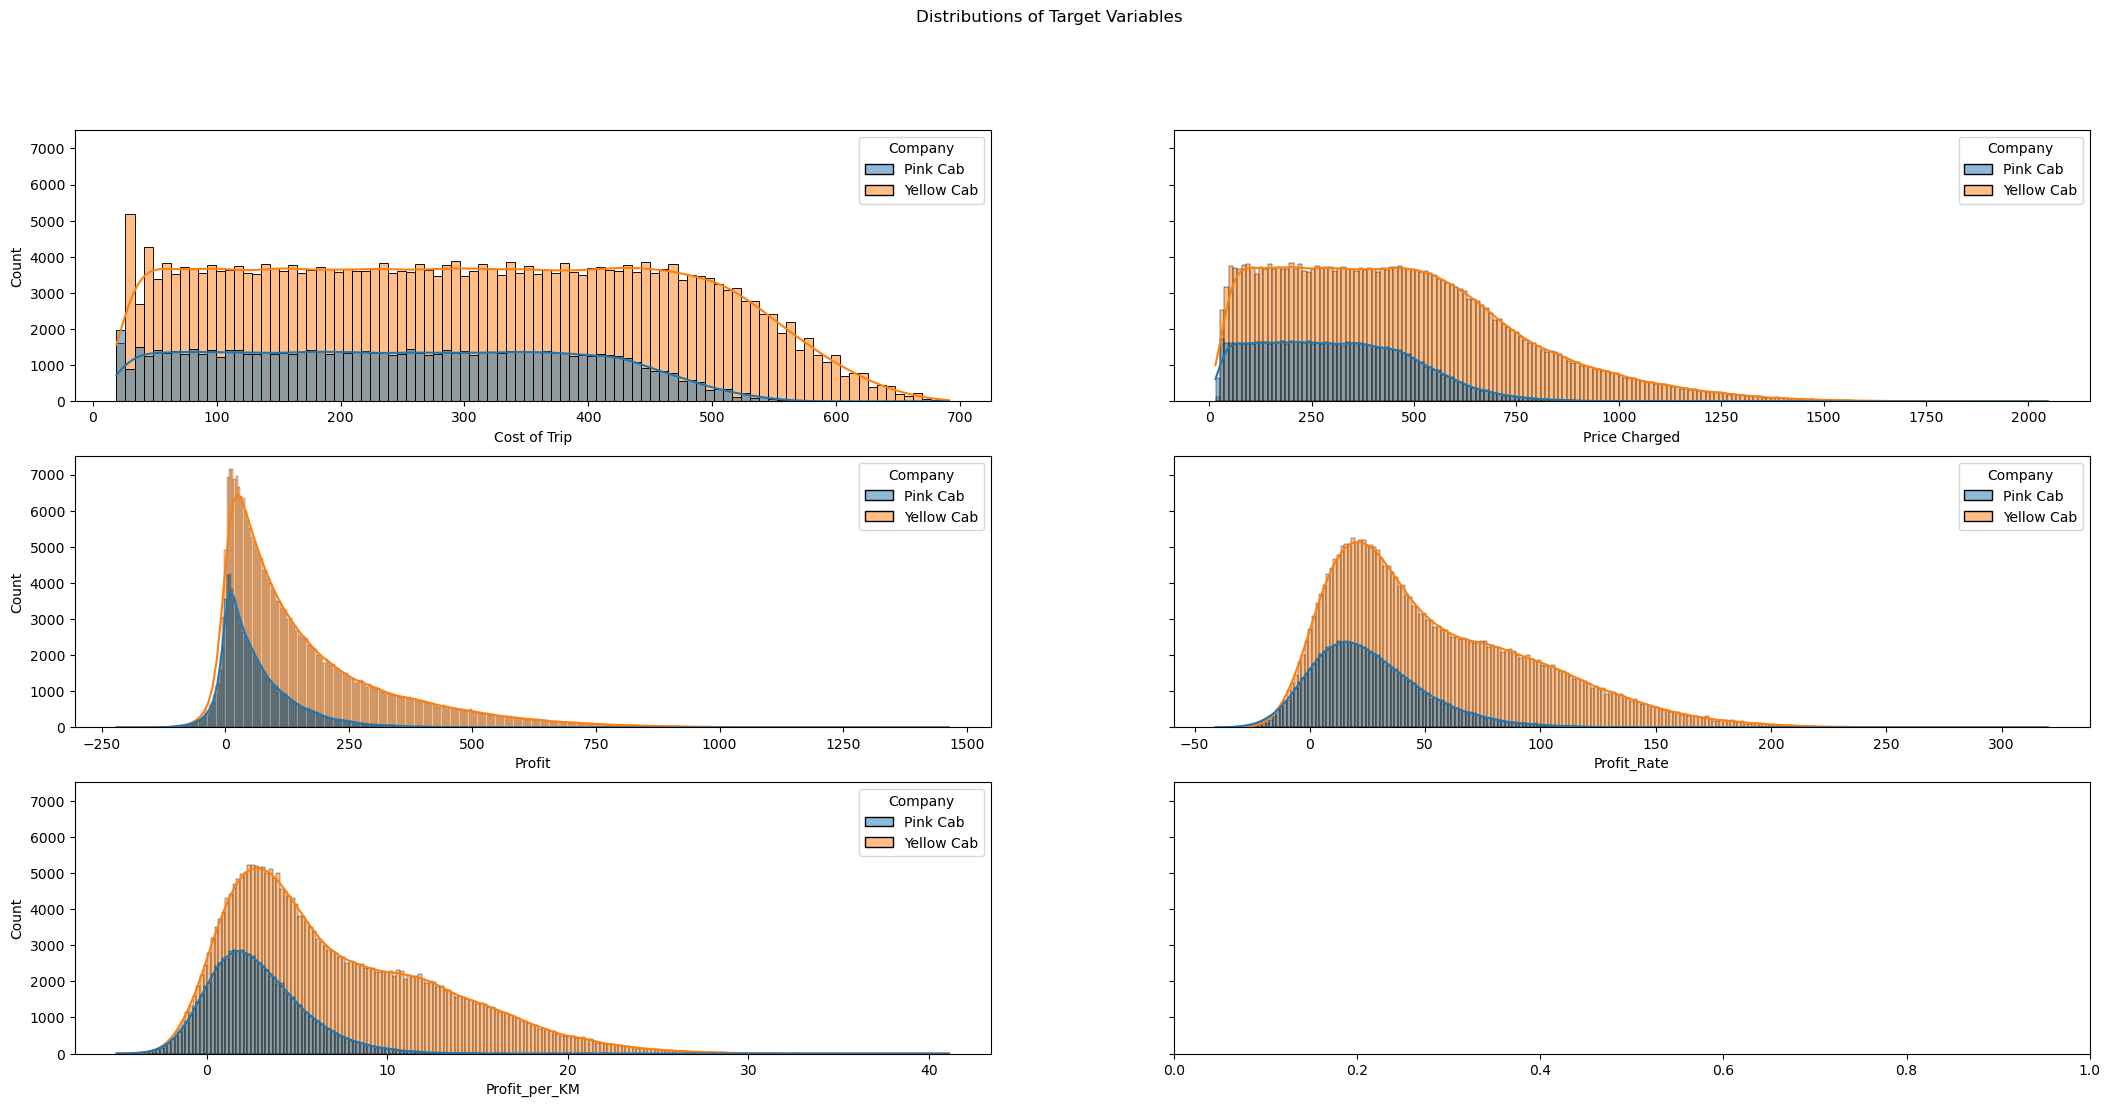

In [36]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=master_data , x='Cost of Trip' ,kde =True, hue="Company")
sns.histplot(ax=axes[0,1], data=master_data , x='Price Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[1,0], data=master_data , x='Profit' , kde = True , hue="Company") 
sns.histplot(ax=axes[1,1], data=master_data , x='Profit_Rate' , kde = True , hue="Company")
sns.histplot(ax=axes[2,0], data=master_data , x='Profit_per_KM' , kde = True , hue="Company")

In [53]:
mask1 = (master_data["Company"] == 'Pink Cab')
Pink_cab_df = master_data[mask1]

mask2 = (master_data["Company"] == 'Yellow Cab')
Yellow_cab_df = master_data[mask2]

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

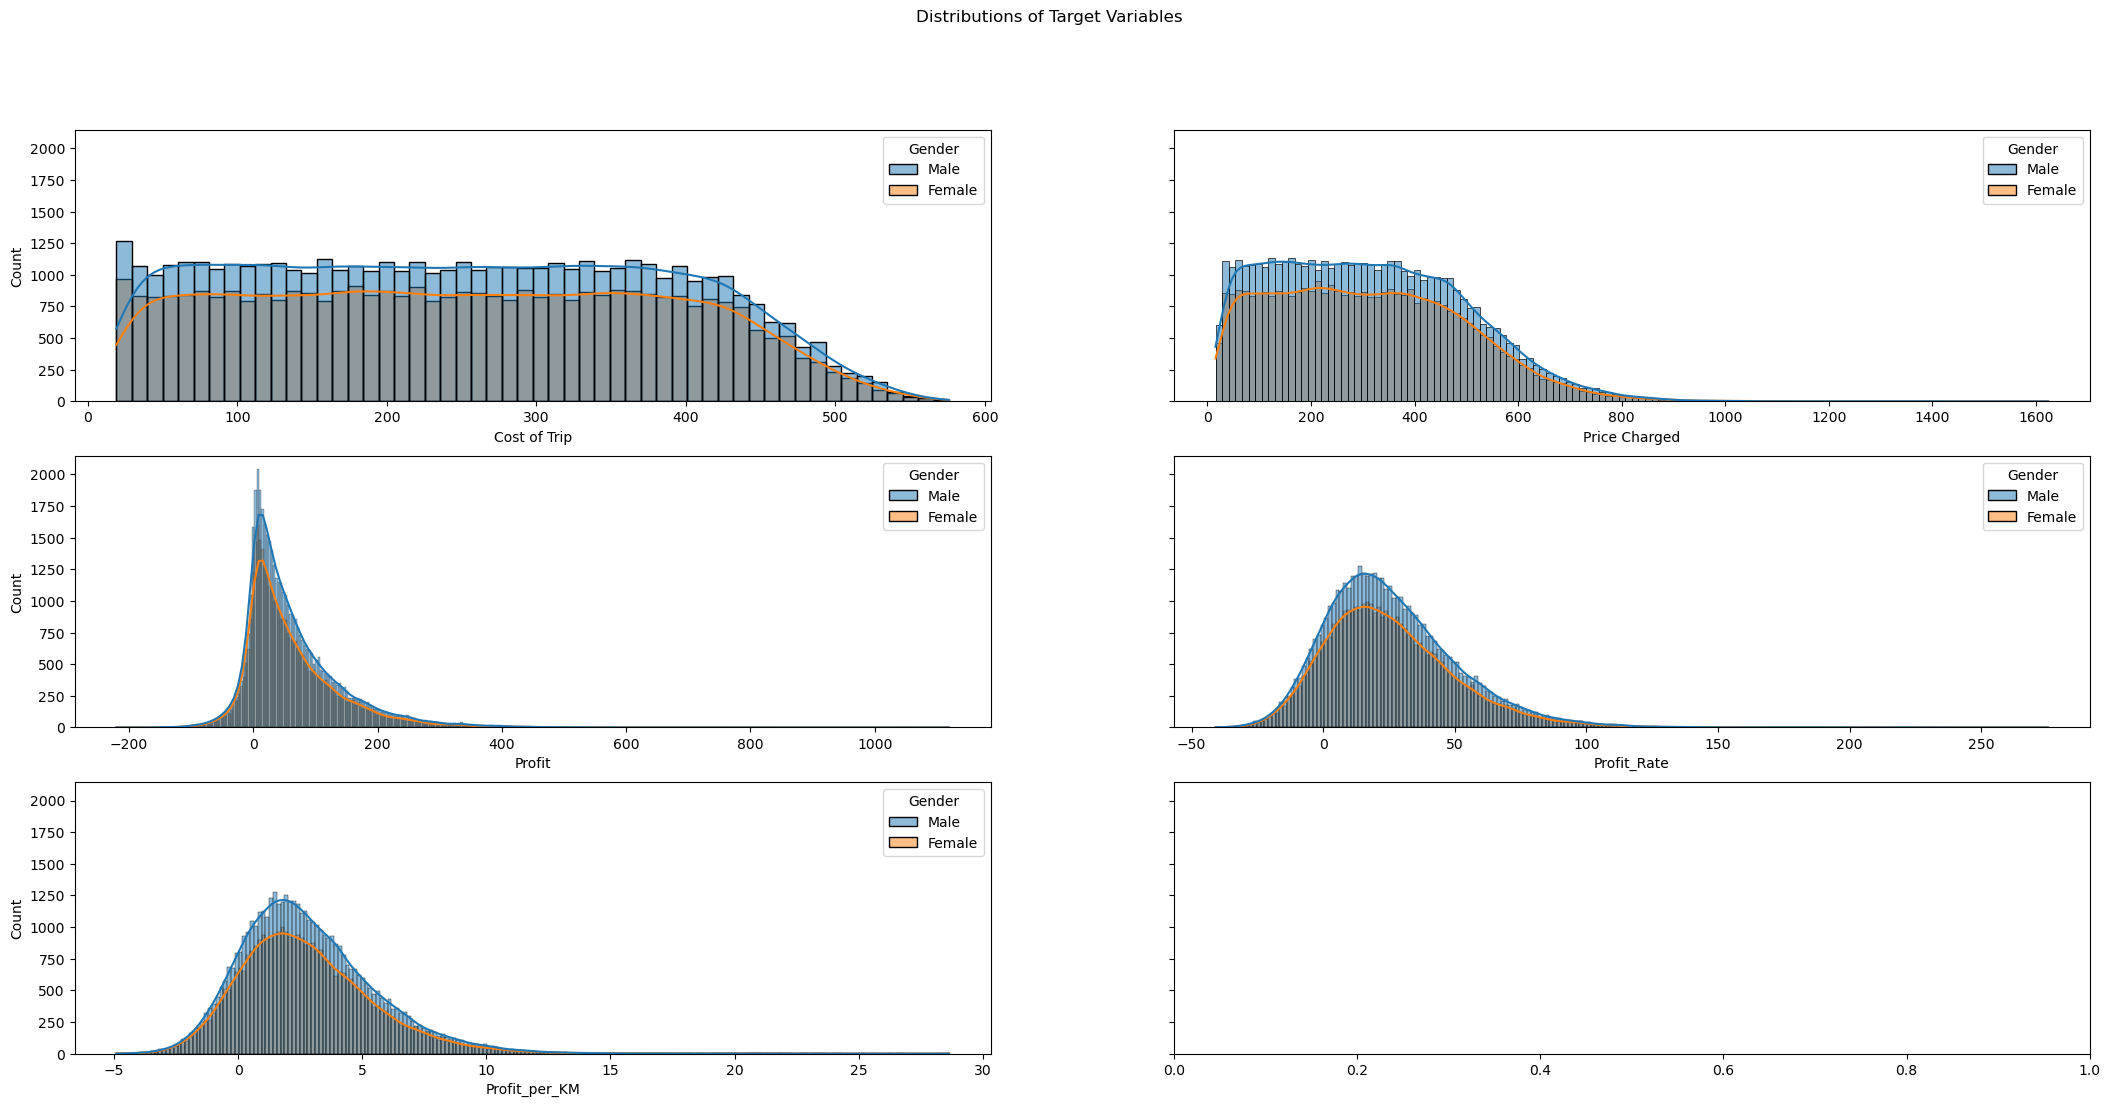

In [51]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Pink_cab_df , x='Cost of Trip' ,kde =True, hue="Gender")
sns.histplot(ax=axes[0,1], data=Pink_cab_df , x='Price Charged' , kde = True , hue="Gender")
sns.histplot(ax=axes[1,0], data=Pink_cab_df , x='Profit' , kde = True , hue="Gender") 
sns.histplot(ax=axes[1,1], data=Pink_cab_df , x='Profit_Rate' , kde = True , hue="Gender")
sns.histplot(ax=axes[2,0], data=Pink_cab_df , x='Profit_per_KM' , kde = True , hue="Gender")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

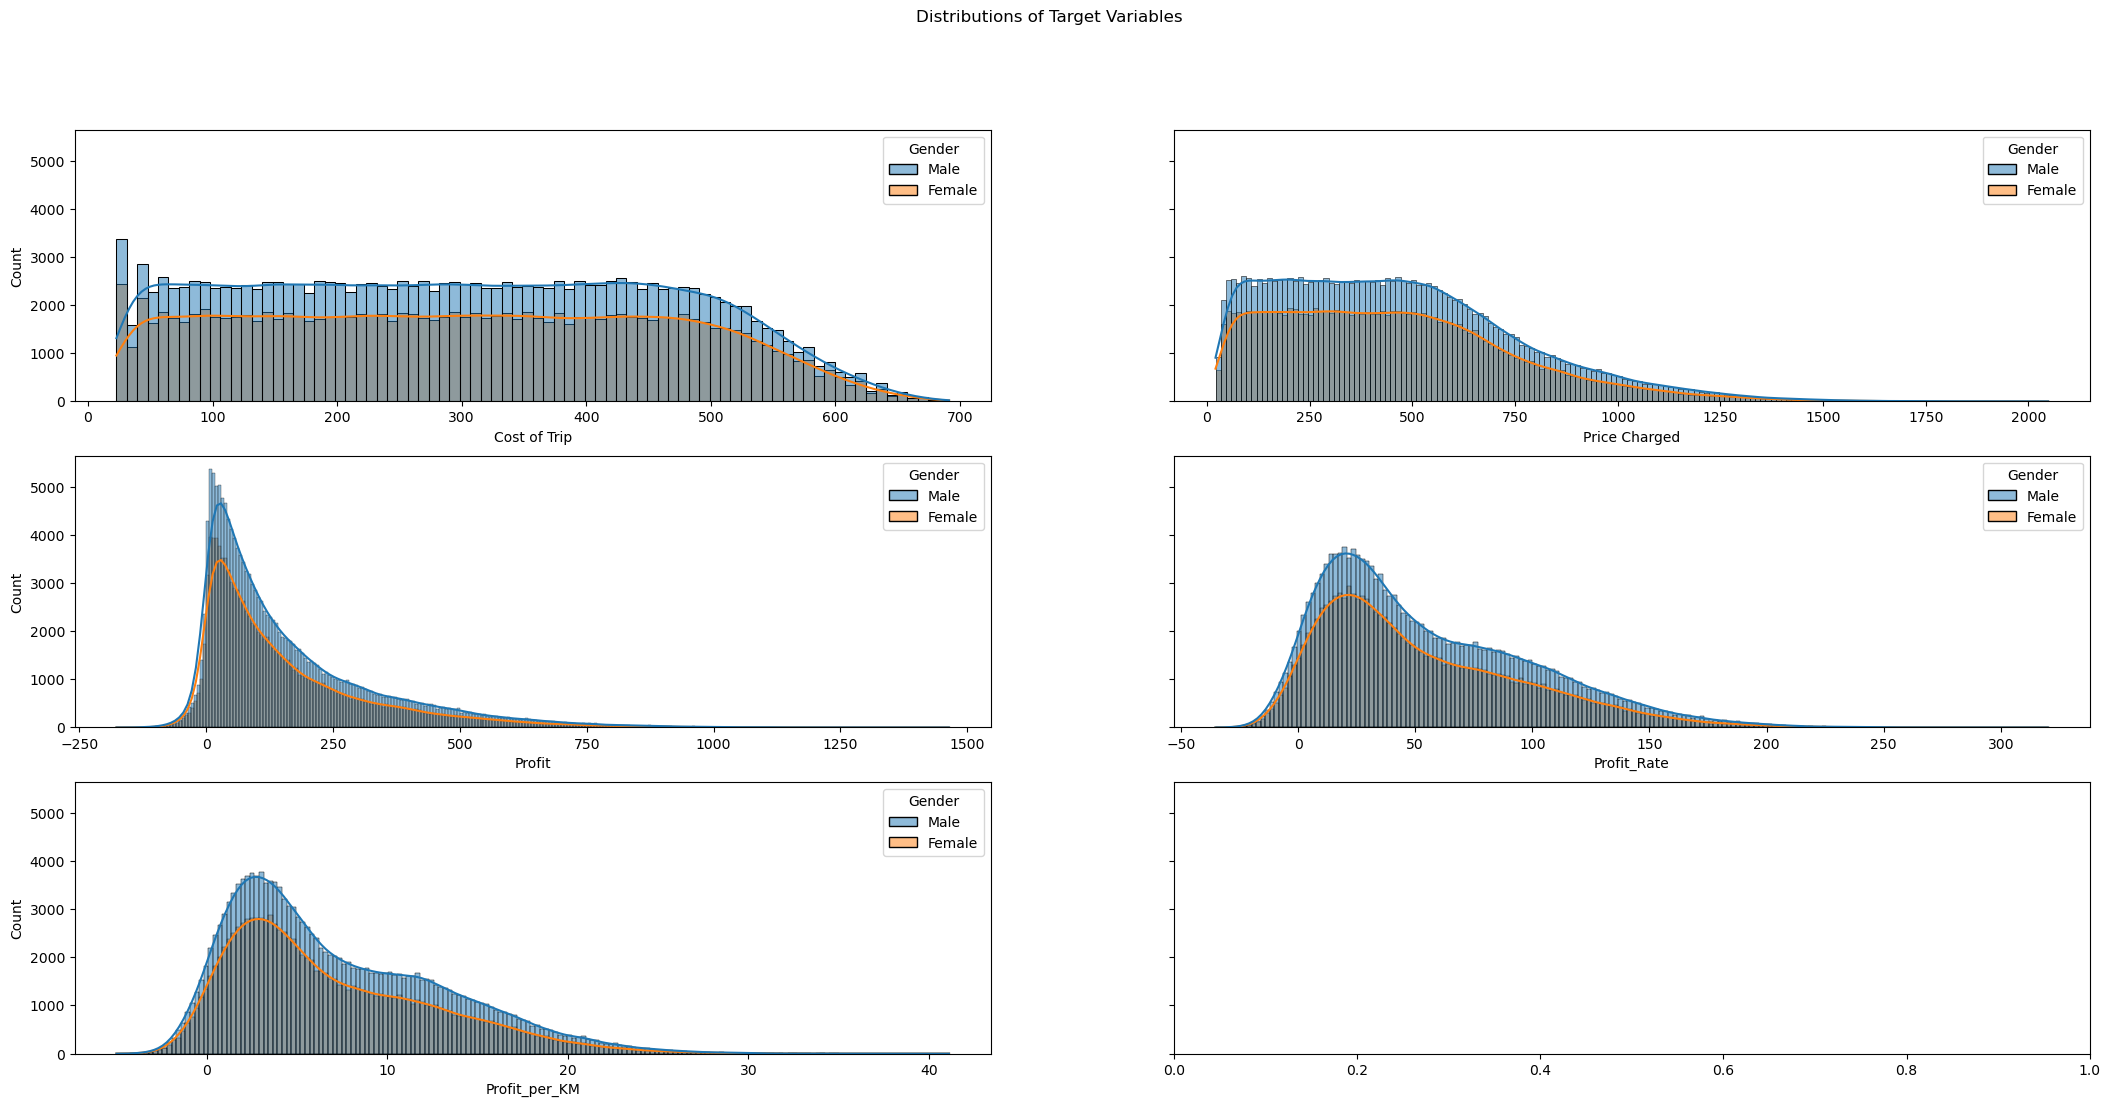

In [54]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Yellow_cab_df , x='Cost of Trip' ,kde =True, hue="Gender")
sns.histplot(ax=axes[0,1], data=Yellow_cab_df , x='Price Charged' , kde = True , hue="Gender")
sns.histplot(ax=axes[1,0], data=Yellow_cab_df , x='Profit' , kde = True , hue="Gender") 
sns.histplot(ax=axes[1,1], data=Yellow_cab_df , x='Profit_Rate' , kde = True , hue="Gender")
sns.histplot(ax=axes[2,0], data=Yellow_cab_df , x='Profit_per_KM' , kde = True , hue="Gender")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

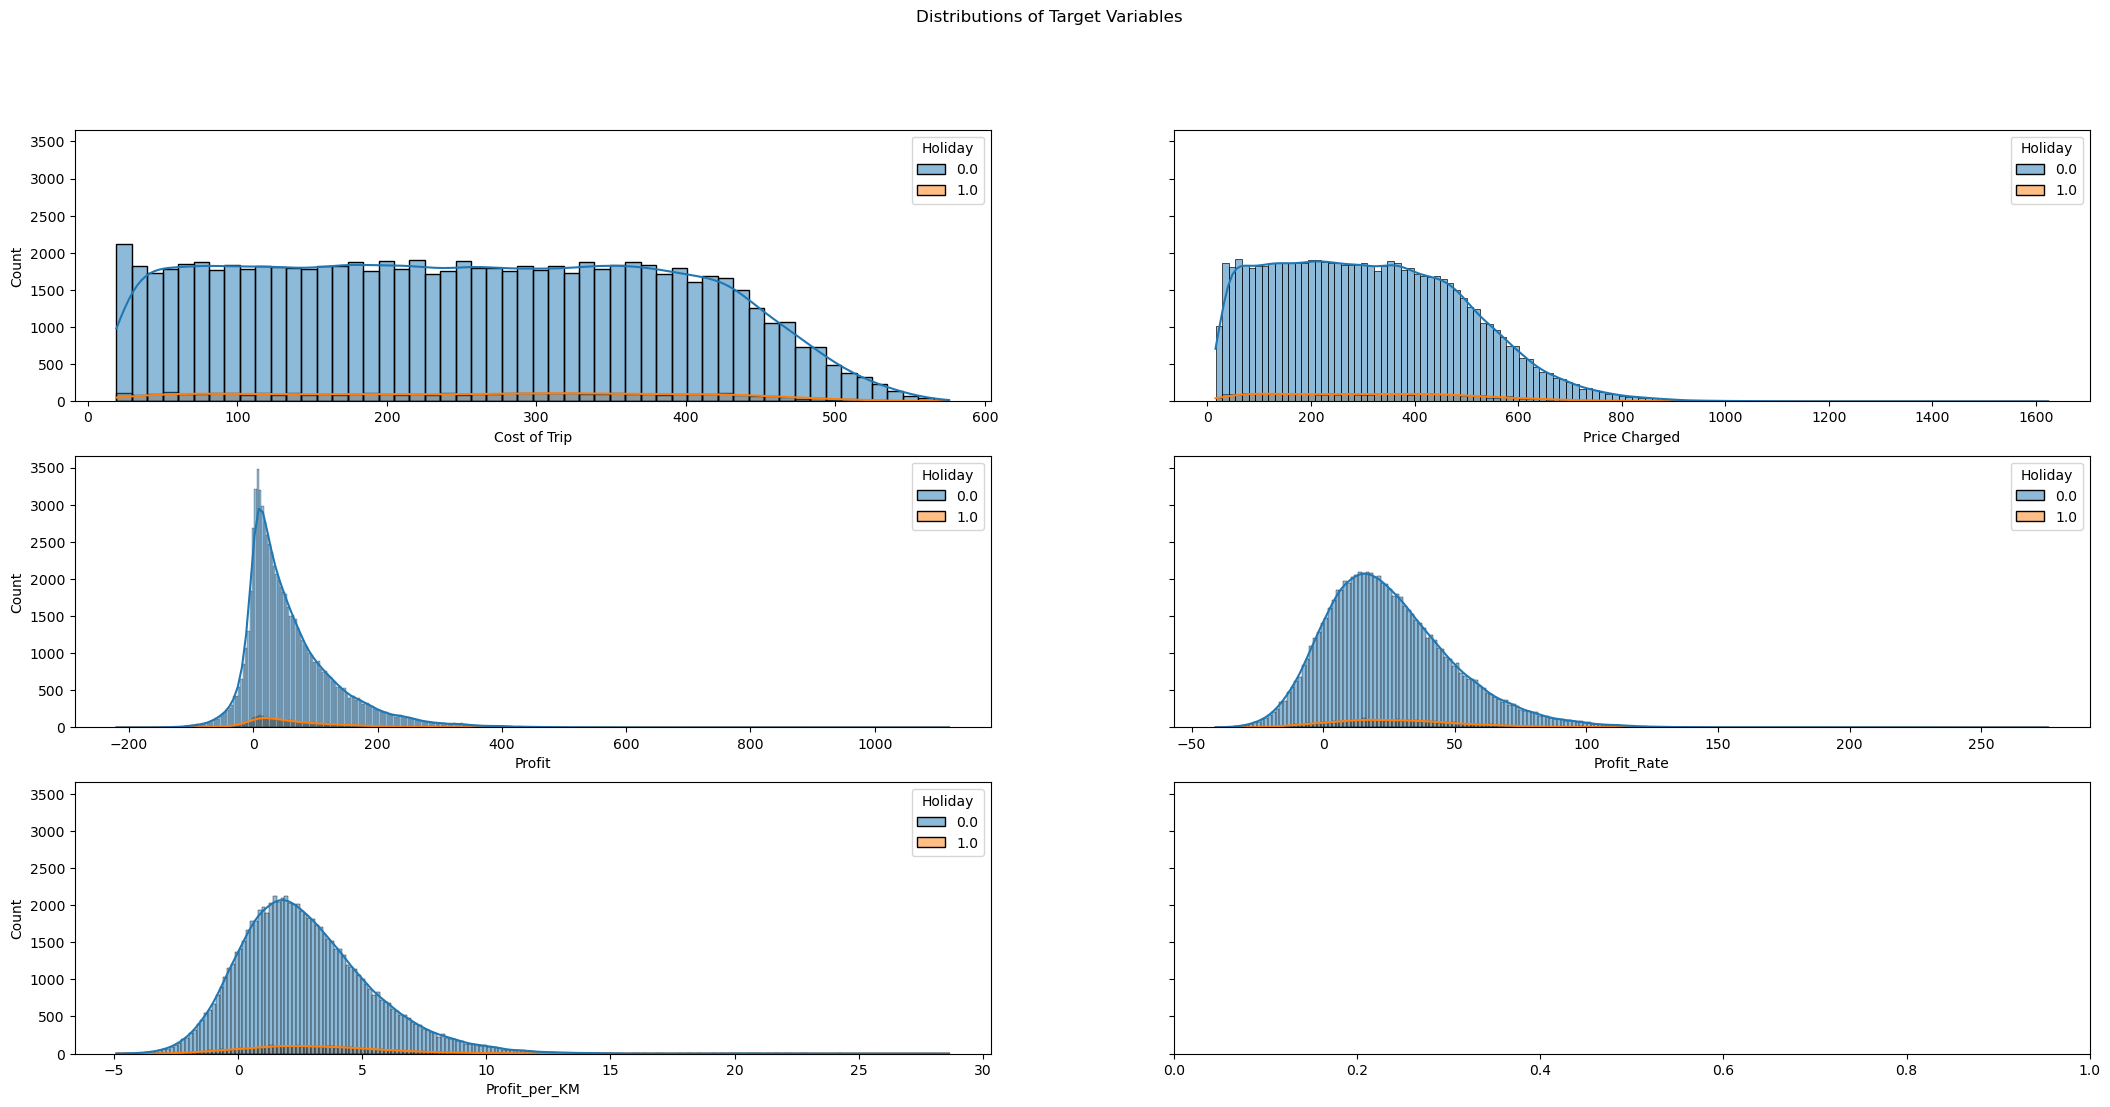

In [55]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Pink_cab_df , x='Cost of Trip' ,kde =True, hue="Holiday")
sns.histplot(ax=axes[0,1], data=Pink_cab_df , x='Price Charged' , kde = True , hue="Holiday")
sns.histplot(ax=axes[1,0], data=Pink_cab_df , x='Profit' , kde = True , hue="Holiday") 
sns.histplot(ax=axes[1,1], data=Pink_cab_df , x='Profit_Rate' , kde = True , hue="Holiday")
sns.histplot(ax=axes[2,0], data=Pink_cab_df , x='Profit_per_KM' , kde = True , hue="Holiday")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

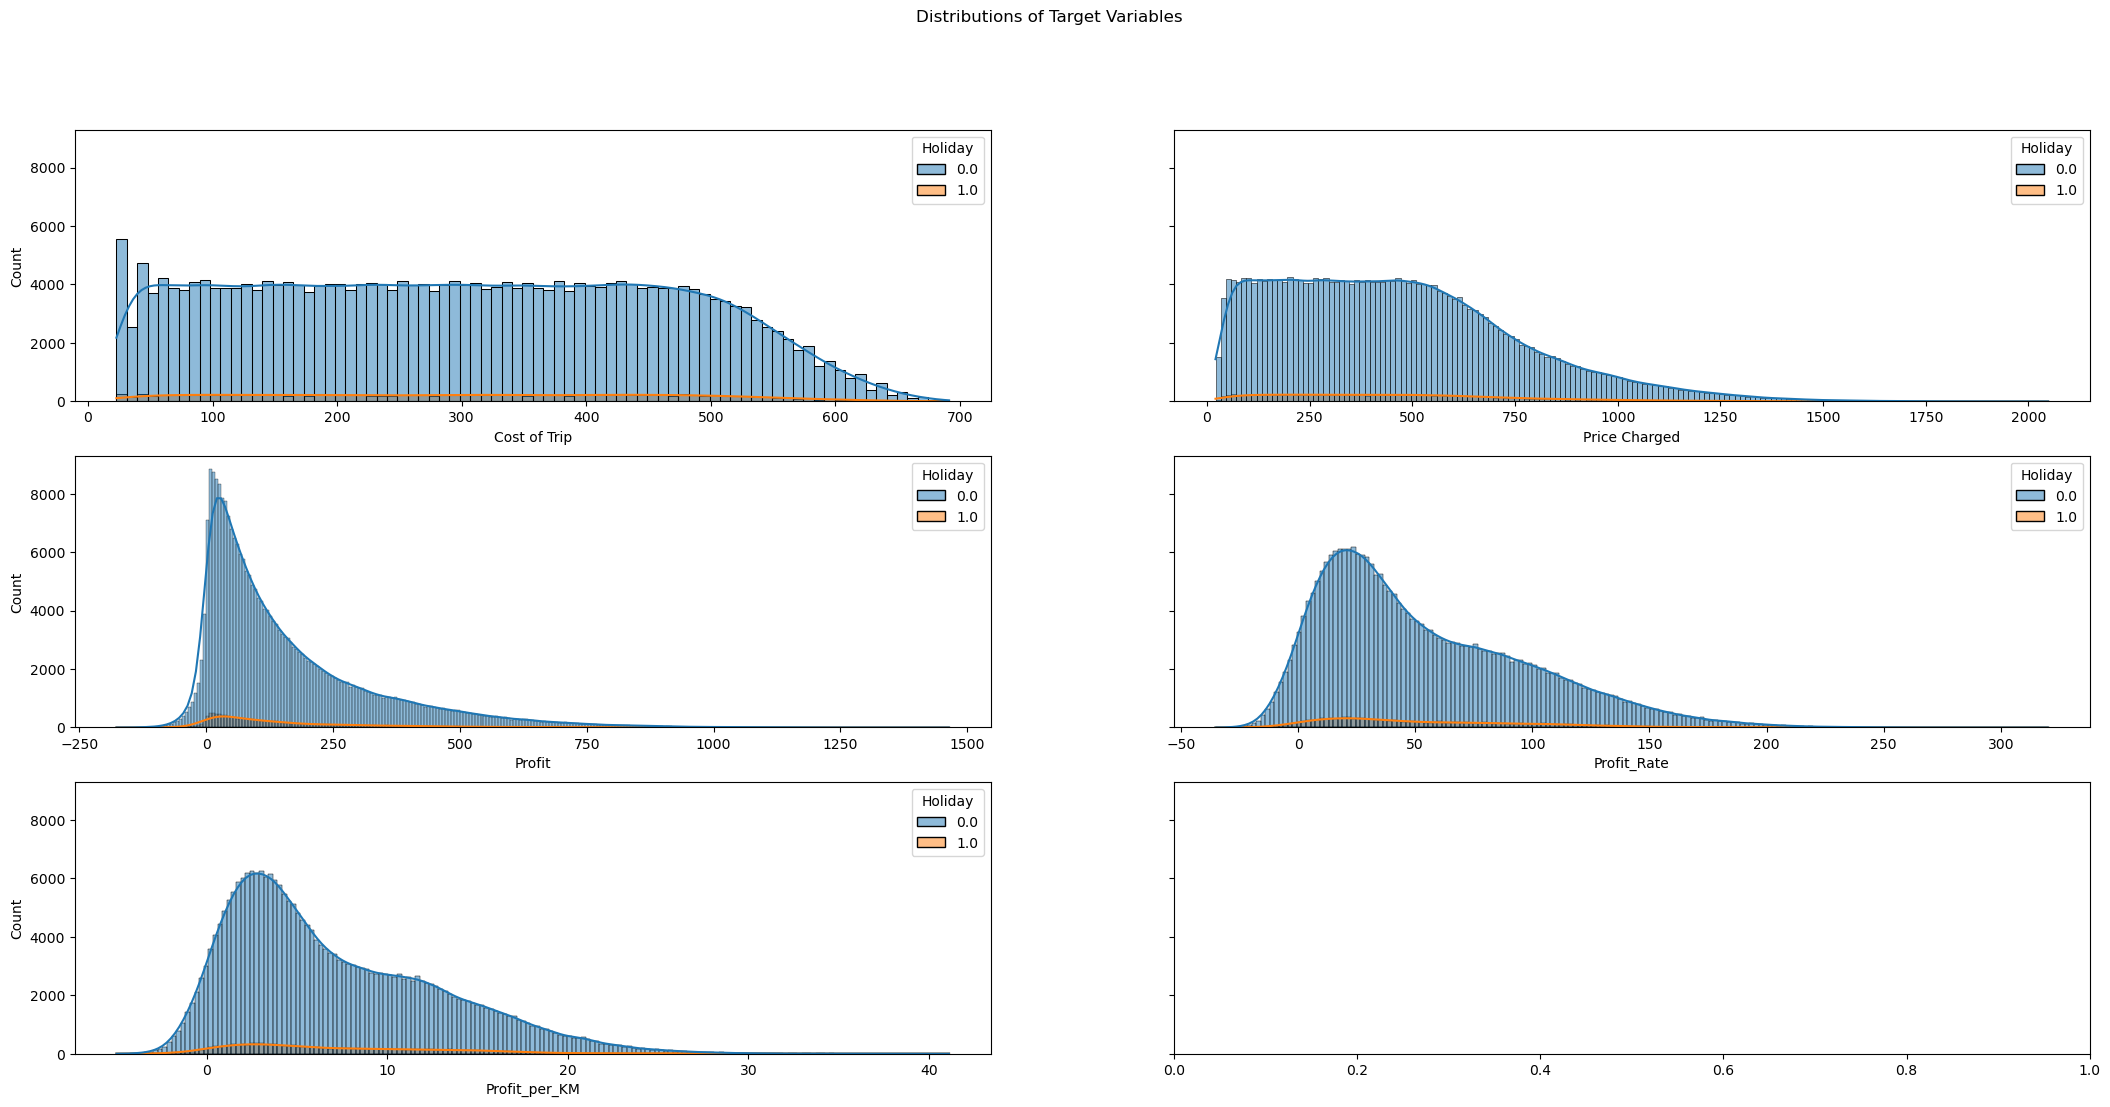

In [56]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Yellow_cab_df , x='Cost of Trip' ,kde =True, hue="Holiday")
sns.histplot(ax=axes[0,1], data=Yellow_cab_df , x='Price Charged' , kde = True , hue="Holiday")
sns.histplot(ax=axes[1,0], data=Yellow_cab_df , x='Profit' , kde = True , hue="Holiday") 
sns.histplot(ax=axes[1,1], data=Yellow_cab_df , x='Profit_Rate' , kde = True , hue="Holiday")
sns.histplot(ax=axes[2,0], data=Yellow_cab_df , x='Profit_per_KM' , kde = True , hue="Holiday")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

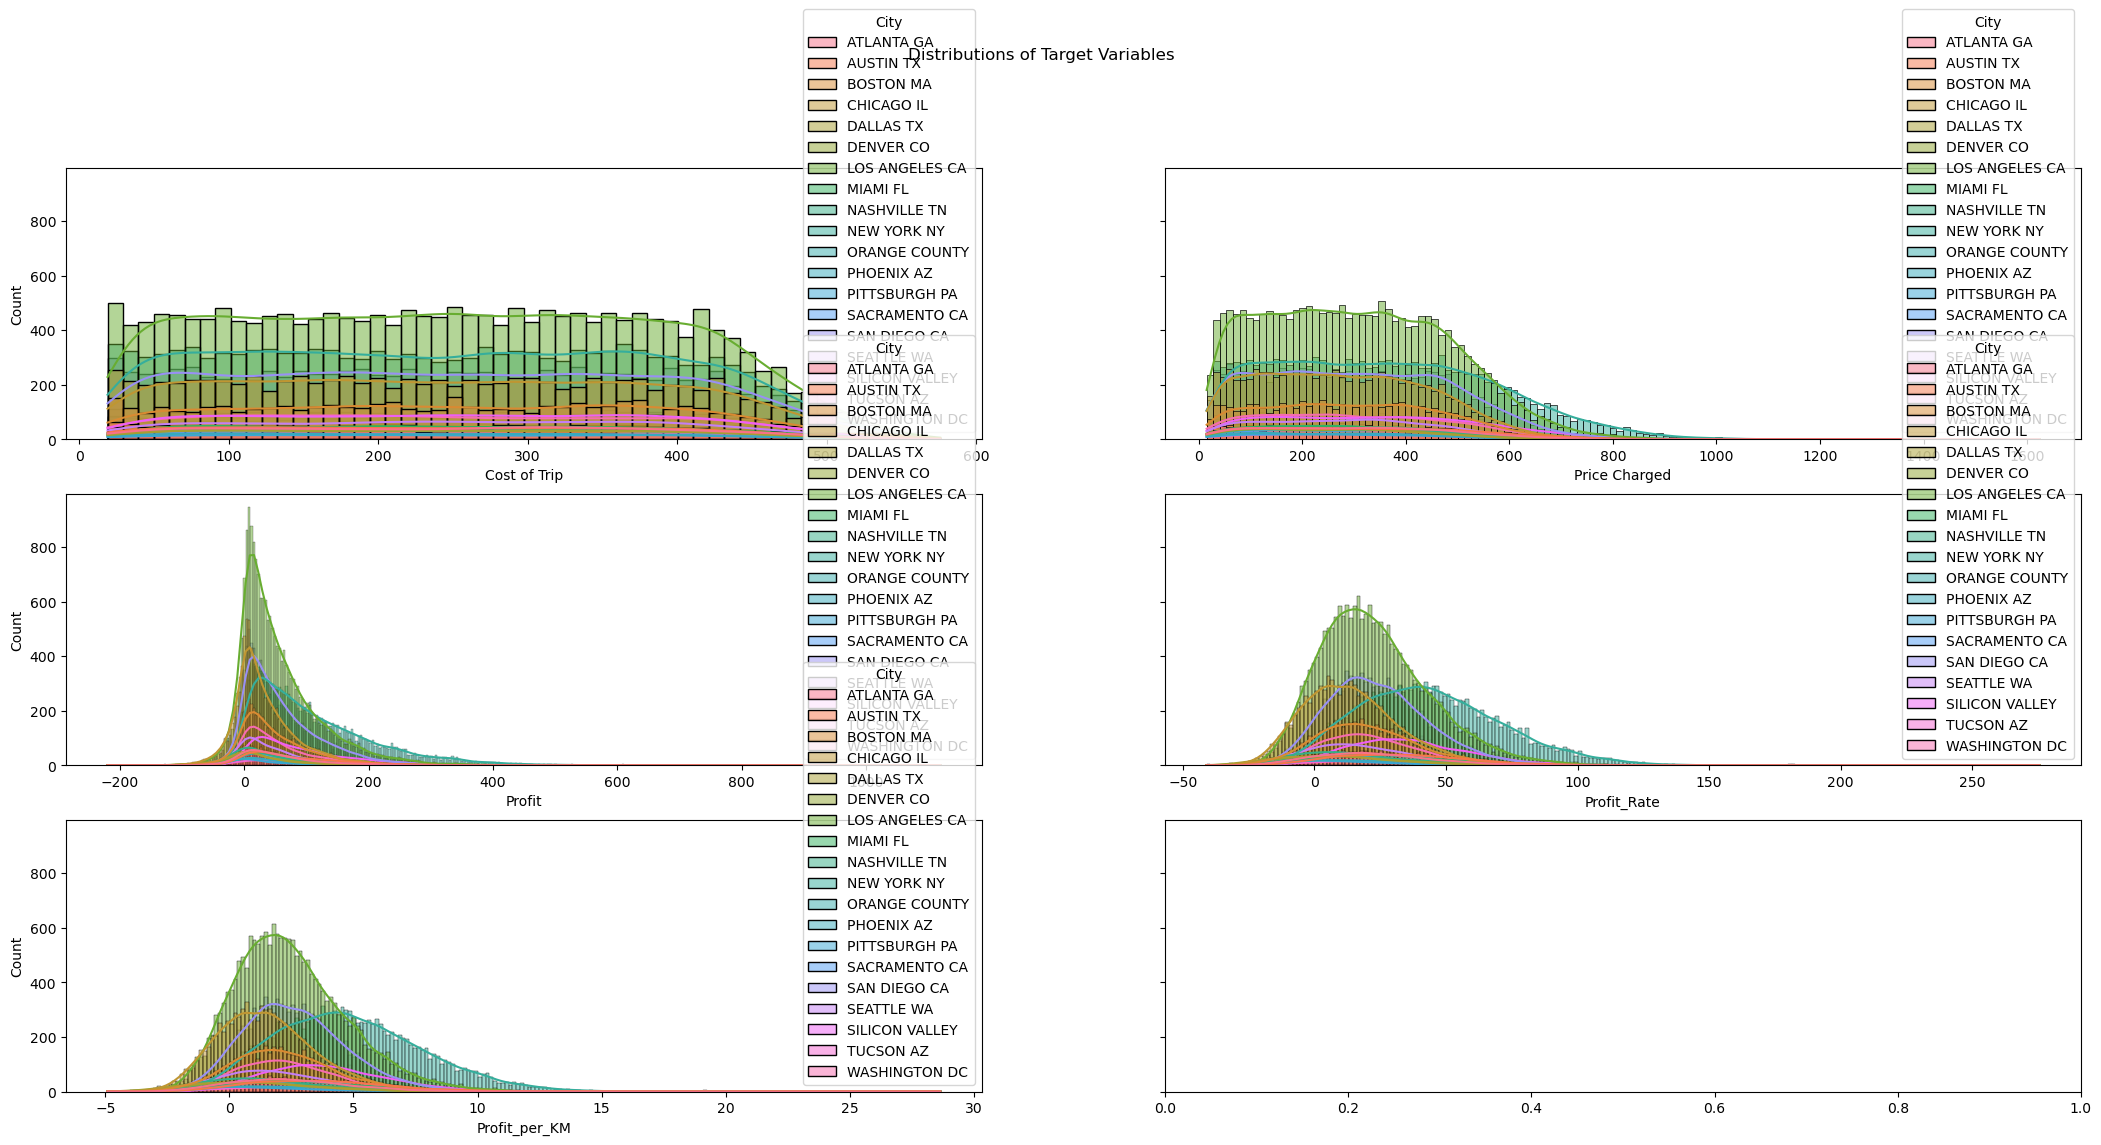

In [57]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Pink_cab_df , x='Cost of Trip' ,kde =True, hue="City")
sns.histplot(ax=axes[0,1], data=Pink_cab_df , x='Price Charged' , kde = True , hue="City")
sns.histplot(ax=axes[1,0], data=Pink_cab_df , x='Profit' , kde = True , hue="City") 
sns.histplot(ax=axes[1,1], data=Pink_cab_df , x='Profit_Rate' , kde = True , hue="City")
sns.histplot(ax=axes[2,0], data=Pink_cab_df , x='Profit_per_KM' , kde = True , hue="City")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

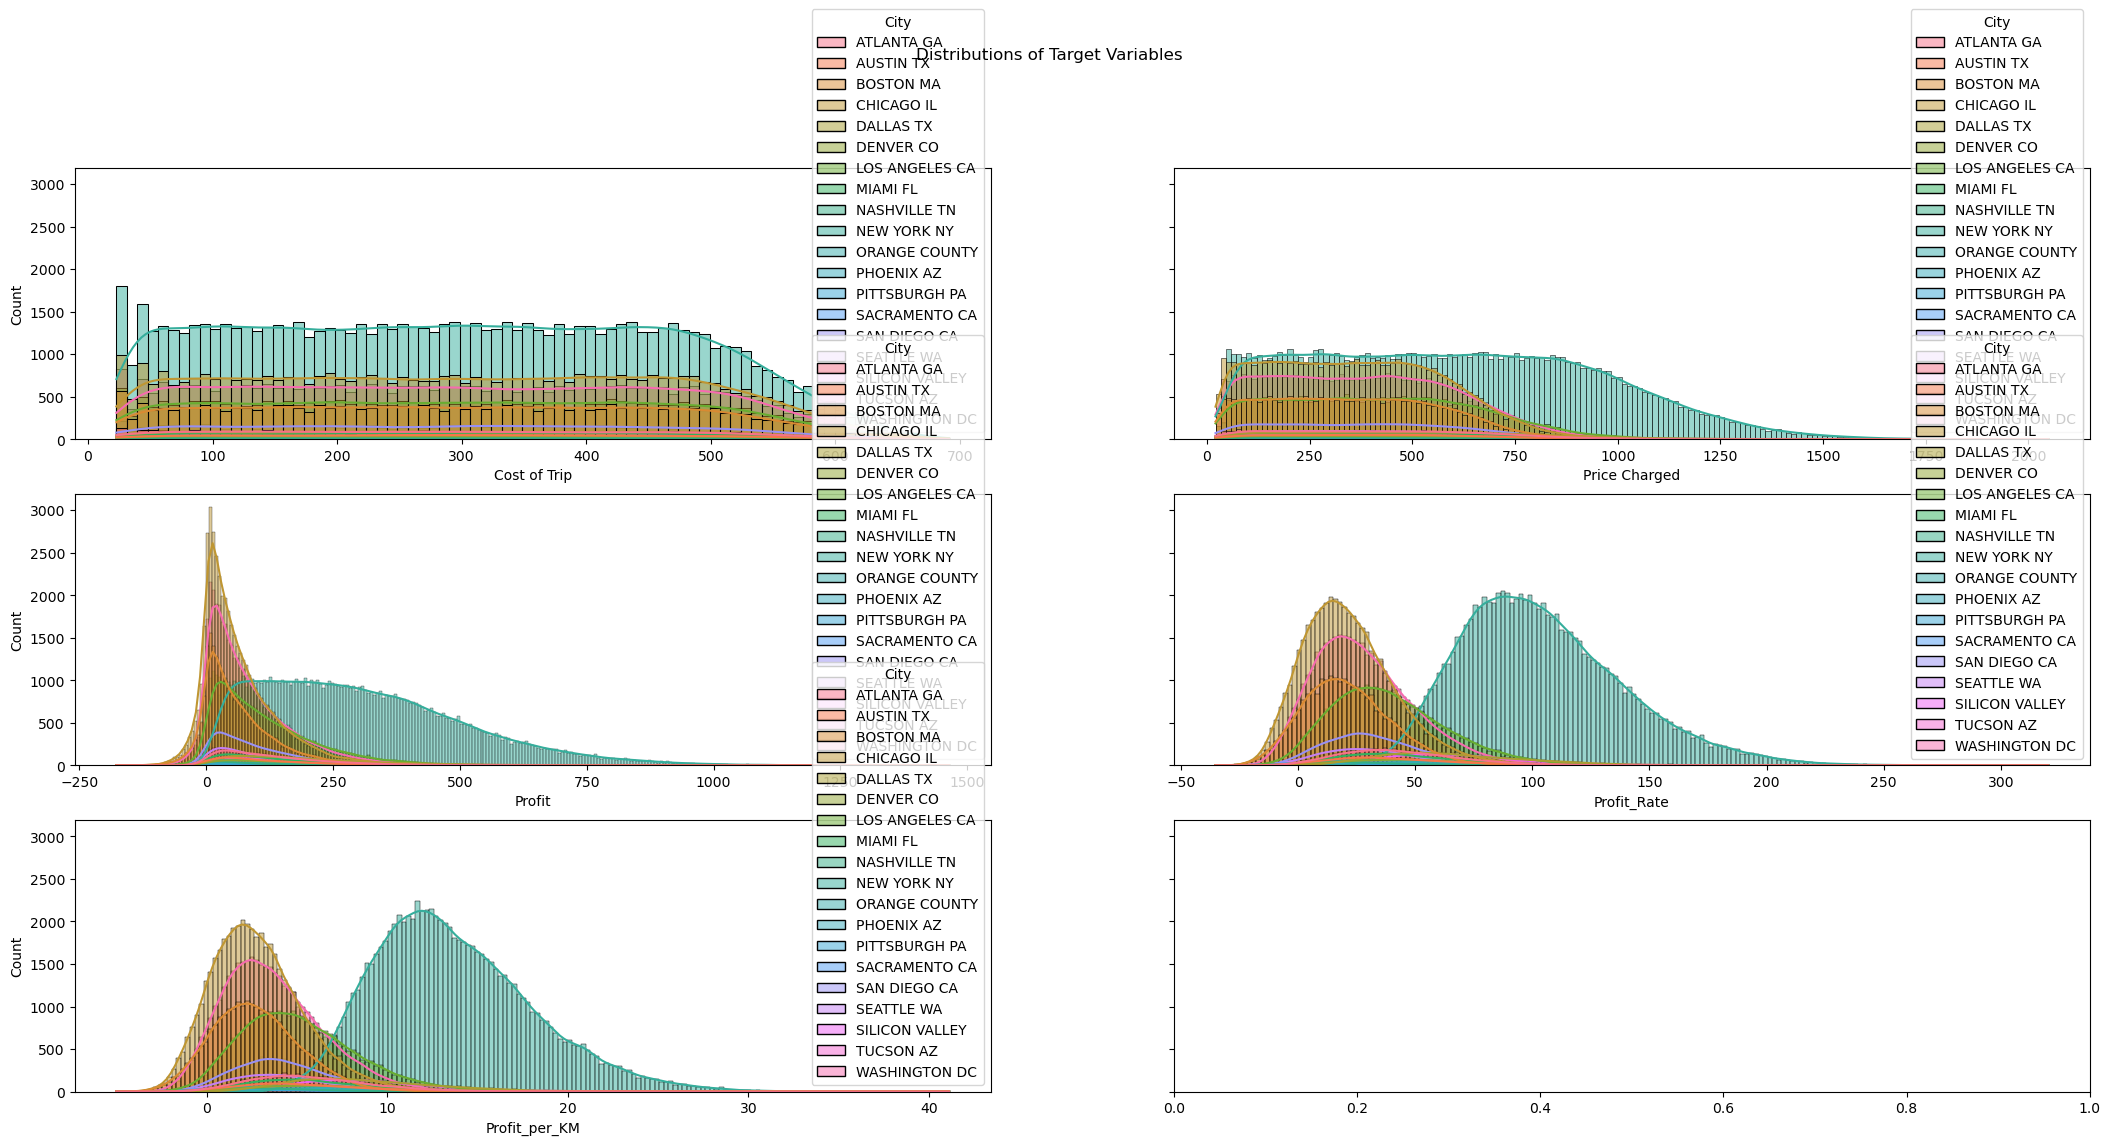

In [58]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Yellow_cab_df , x='Cost of Trip' ,kde =True, hue="City")
sns.histplot(ax=axes[0,1], data=Yellow_cab_df , x='Price Charged' , kde = True , hue="City")
sns.histplot(ax=axes[1,0], data=Yellow_cab_df , x='Profit' , kde = True , hue="City") 
sns.histplot(ax=axes[1,1], data=Yellow_cab_df , x='Profit_Rate' , kde = True , hue="City")
sns.histplot(ax=axes[2,0], data=Yellow_cab_df , x='Profit_per_KM' , kde = True , hue="City")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

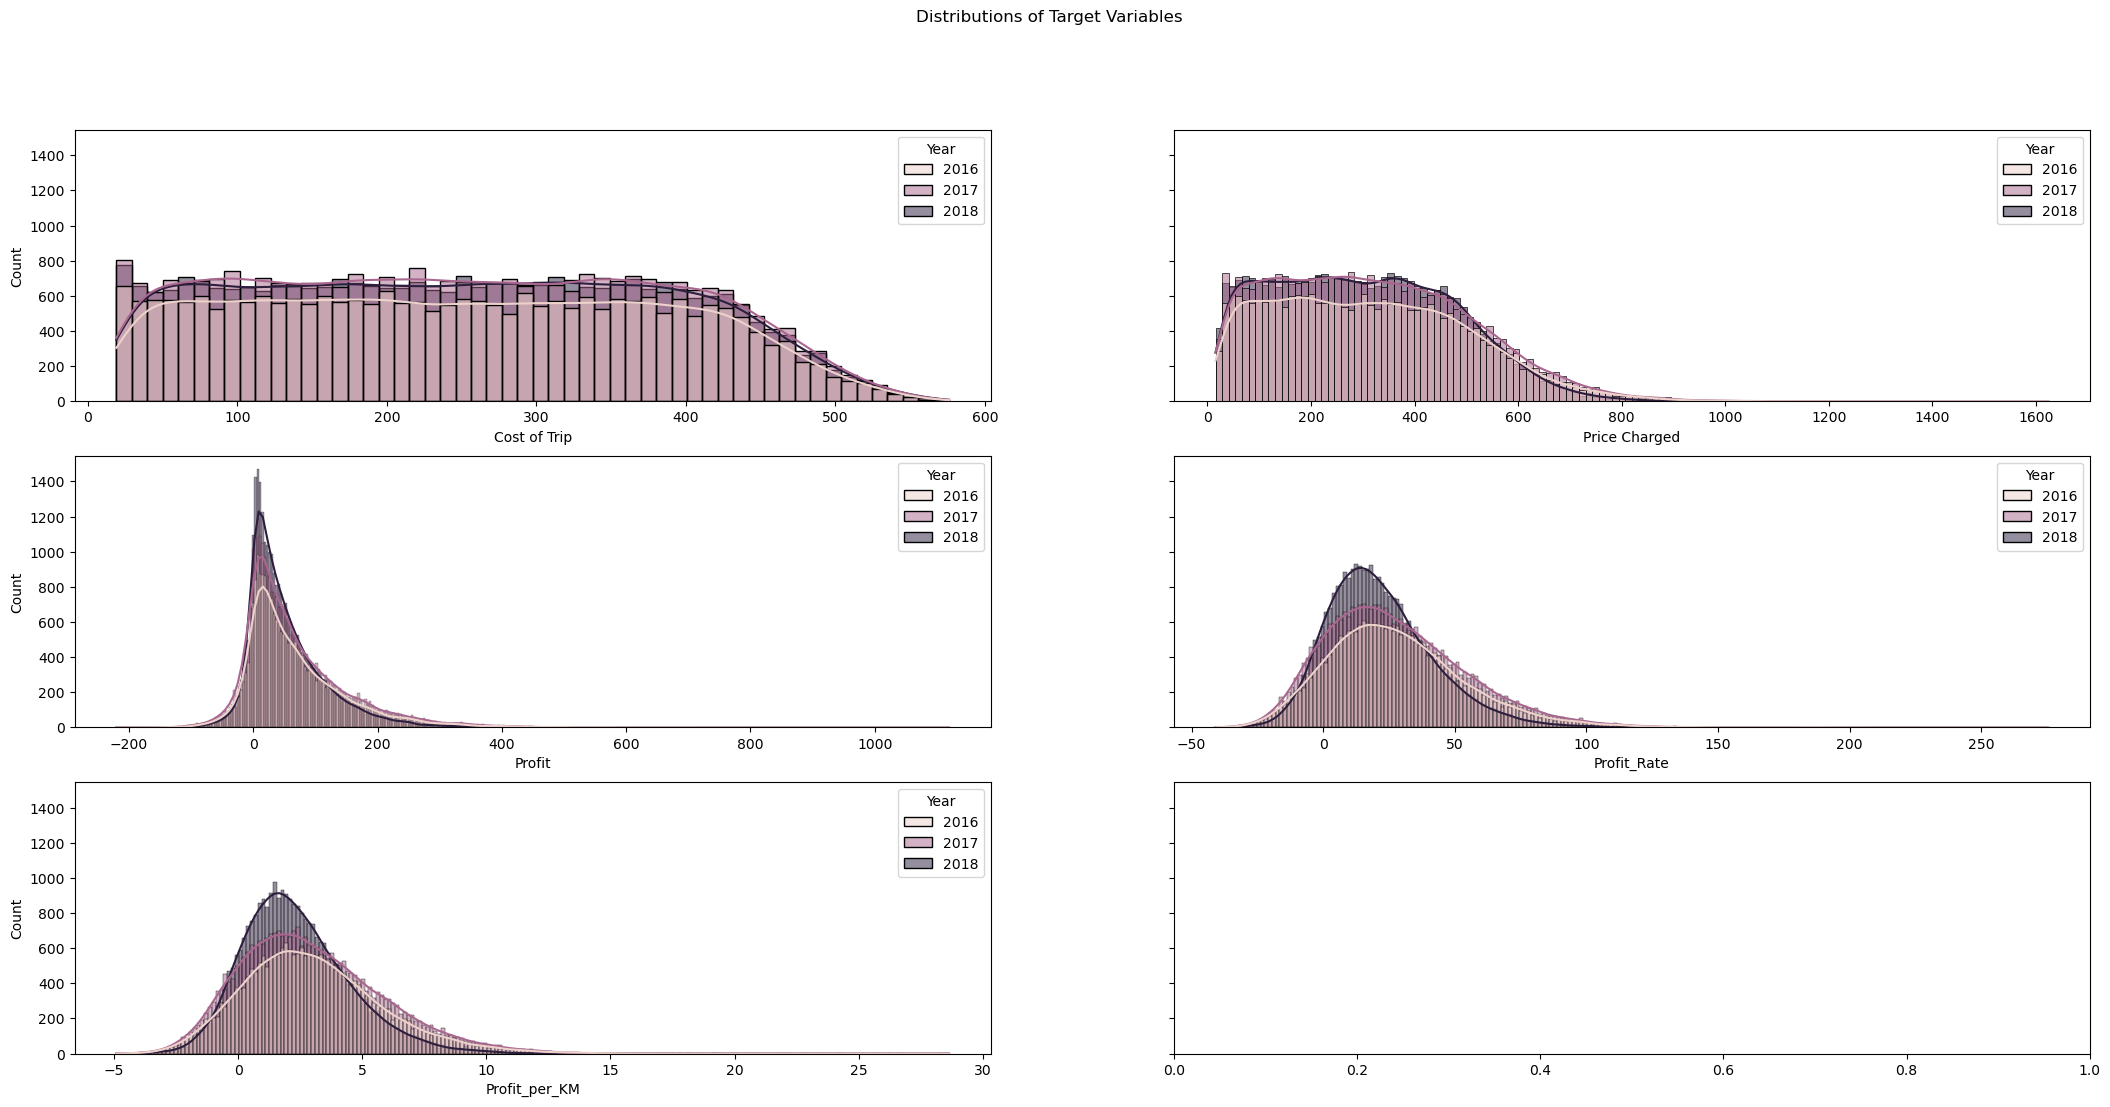

In [60]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Pink_cab_df , x='Cost of Trip' ,kde =True, hue="Year")
sns.histplot(ax=axes[0,1], data=Pink_cab_df, x='Price Charged' , kde = True , hue="Year")
sns.histplot(ax=axes[1,0], data=Pink_cab_df , x='Profit' , kde = True , hue="Year") 
sns.histplot(ax=axes[1,1], data=Pink_cab_df , x='Profit_Rate' , kde = True , hue="Year")
sns.histplot(ax=axes[2,0], data=Pink_cab_df , x='Profit_per_KM' , kde = True , hue="Year")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

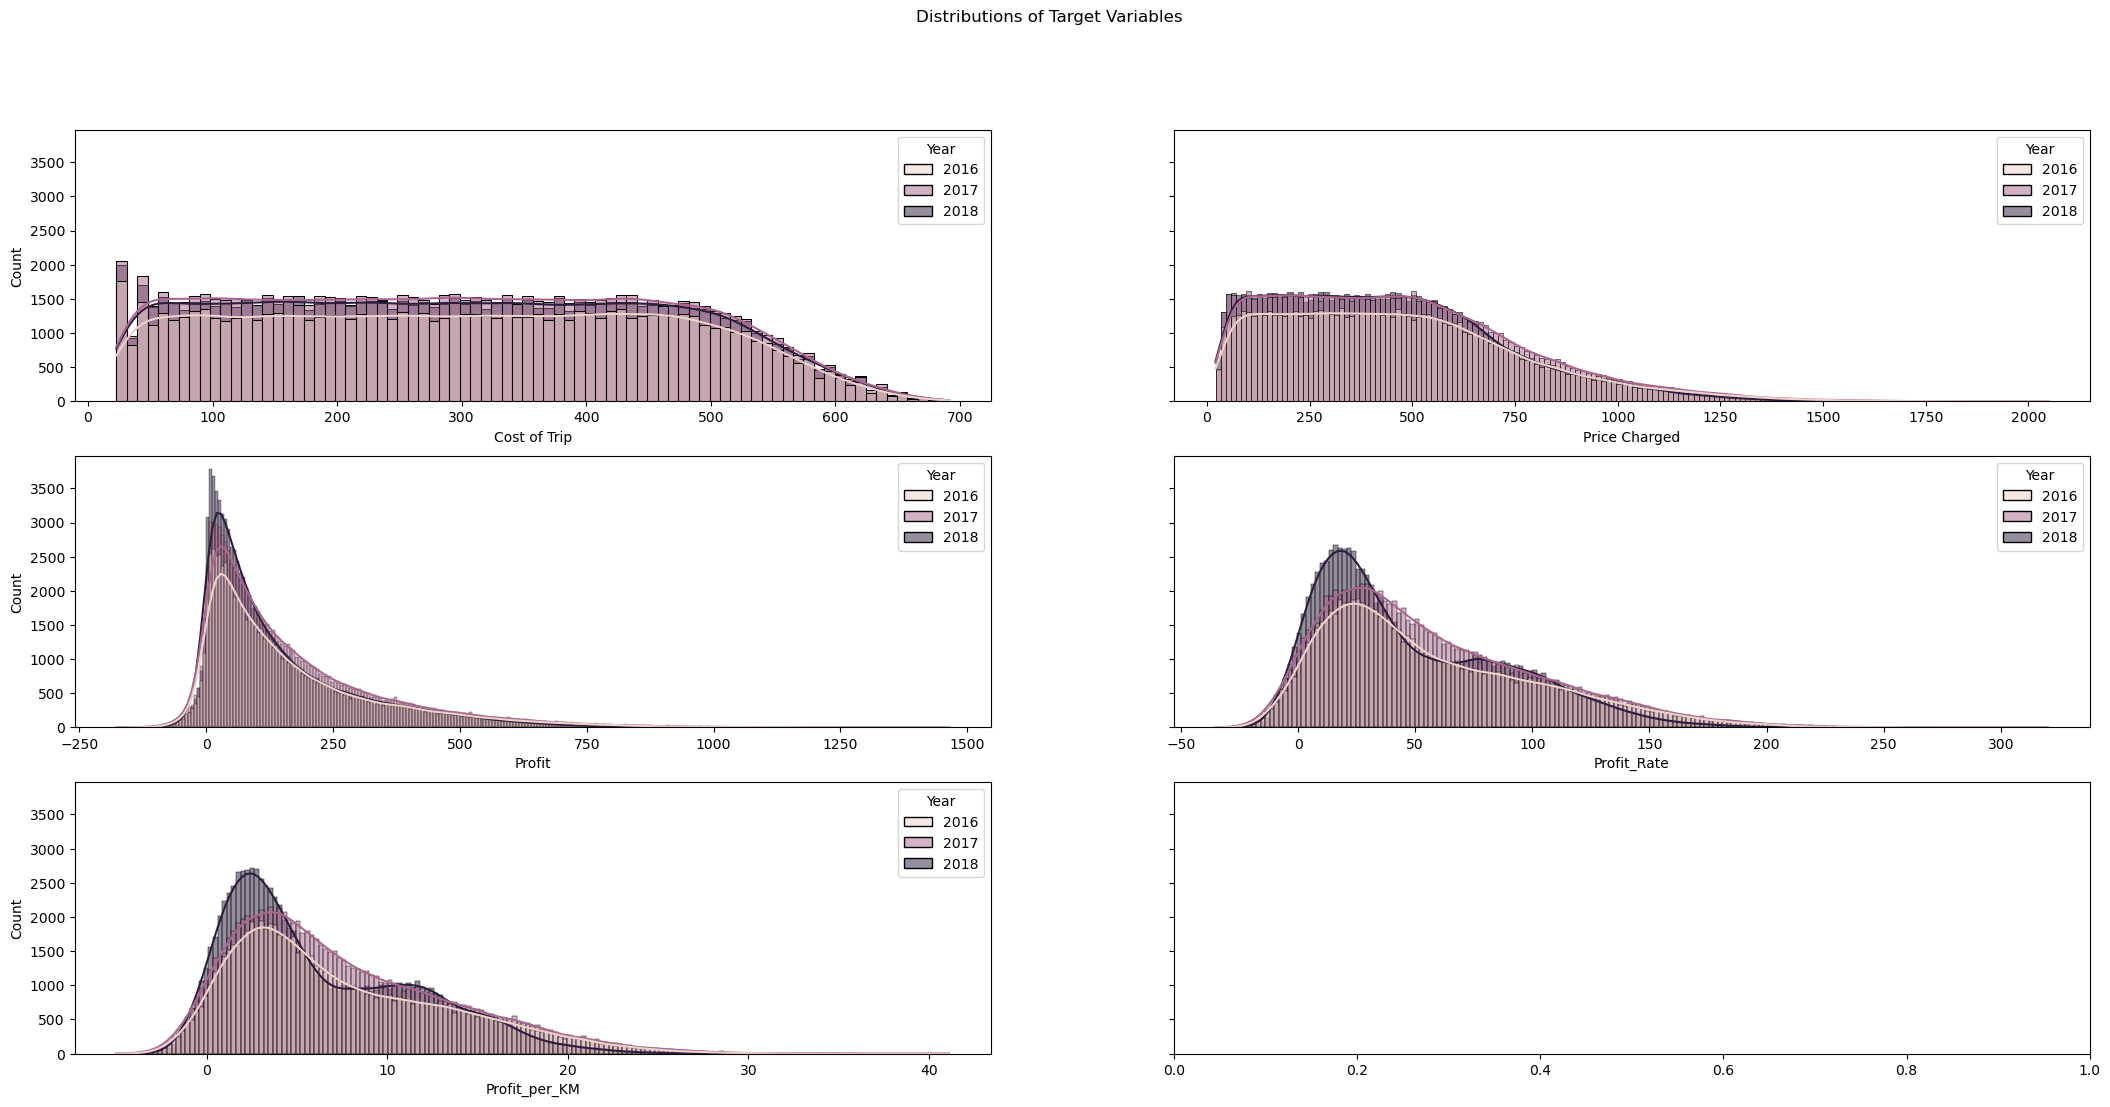

In [59]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Yellow_cab_df , x='Cost of Trip' ,kde =True, hue="Year")
sns.histplot(ax=axes[0,1], data=Yellow_cab_df, x='Price Charged' , kde = True , hue="Year")
sns.histplot(ax=axes[1,0], data=Yellow_cab_df , x='Profit' , kde = True , hue="Year") 
sns.histplot(ax=axes[1,1], data=Yellow_cab_df , x='Profit_Rate' , kde = True , hue="Year")
sns.histplot(ax=axes[2,0], data=Yellow_cab_df , x='Profit_per_KM' , kde = True , hue="Year")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

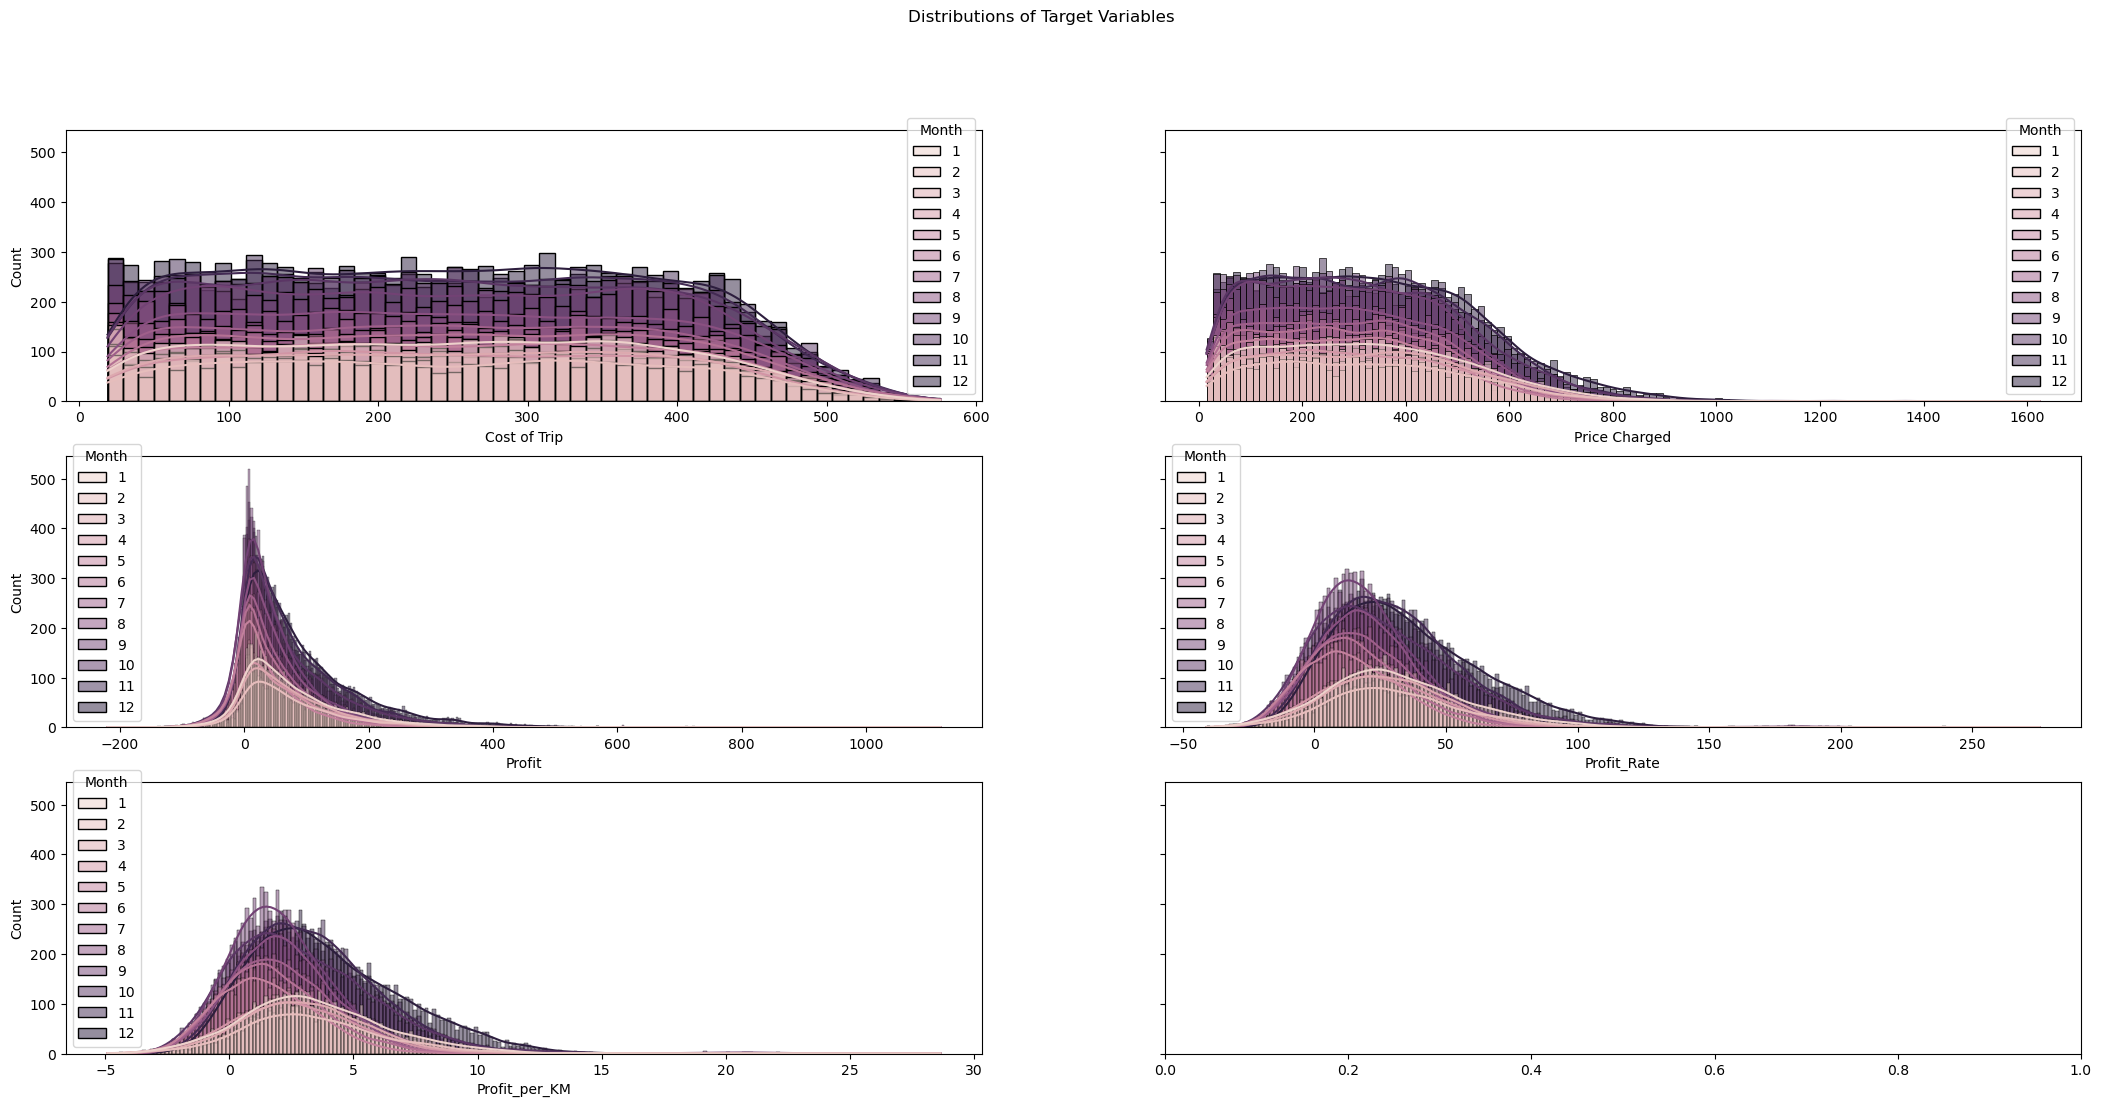

In [62]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Pink_cab_df, x='Cost of Trip' ,kde =True, hue="Month")
sns.histplot(ax=axes[0,1], data=Pink_cab_df, x='Price Charged' , kde = True , hue="Month")
sns.histplot(ax=axes[1,0], data=Pink_cab_df , x='Profit' , kde = True , hue="Month") 
sns.histplot(ax=axes[1,1], data=Pink_cab_df , x='Profit_Rate' , kde = True , hue="Month")
sns.histplot(ax=axes[2,0], data=Pink_cab_df , x='Profit_per_KM' , kde = True , hue="Month")

<Axes: xlabel='Profit_per_KM', ylabel='Count'>

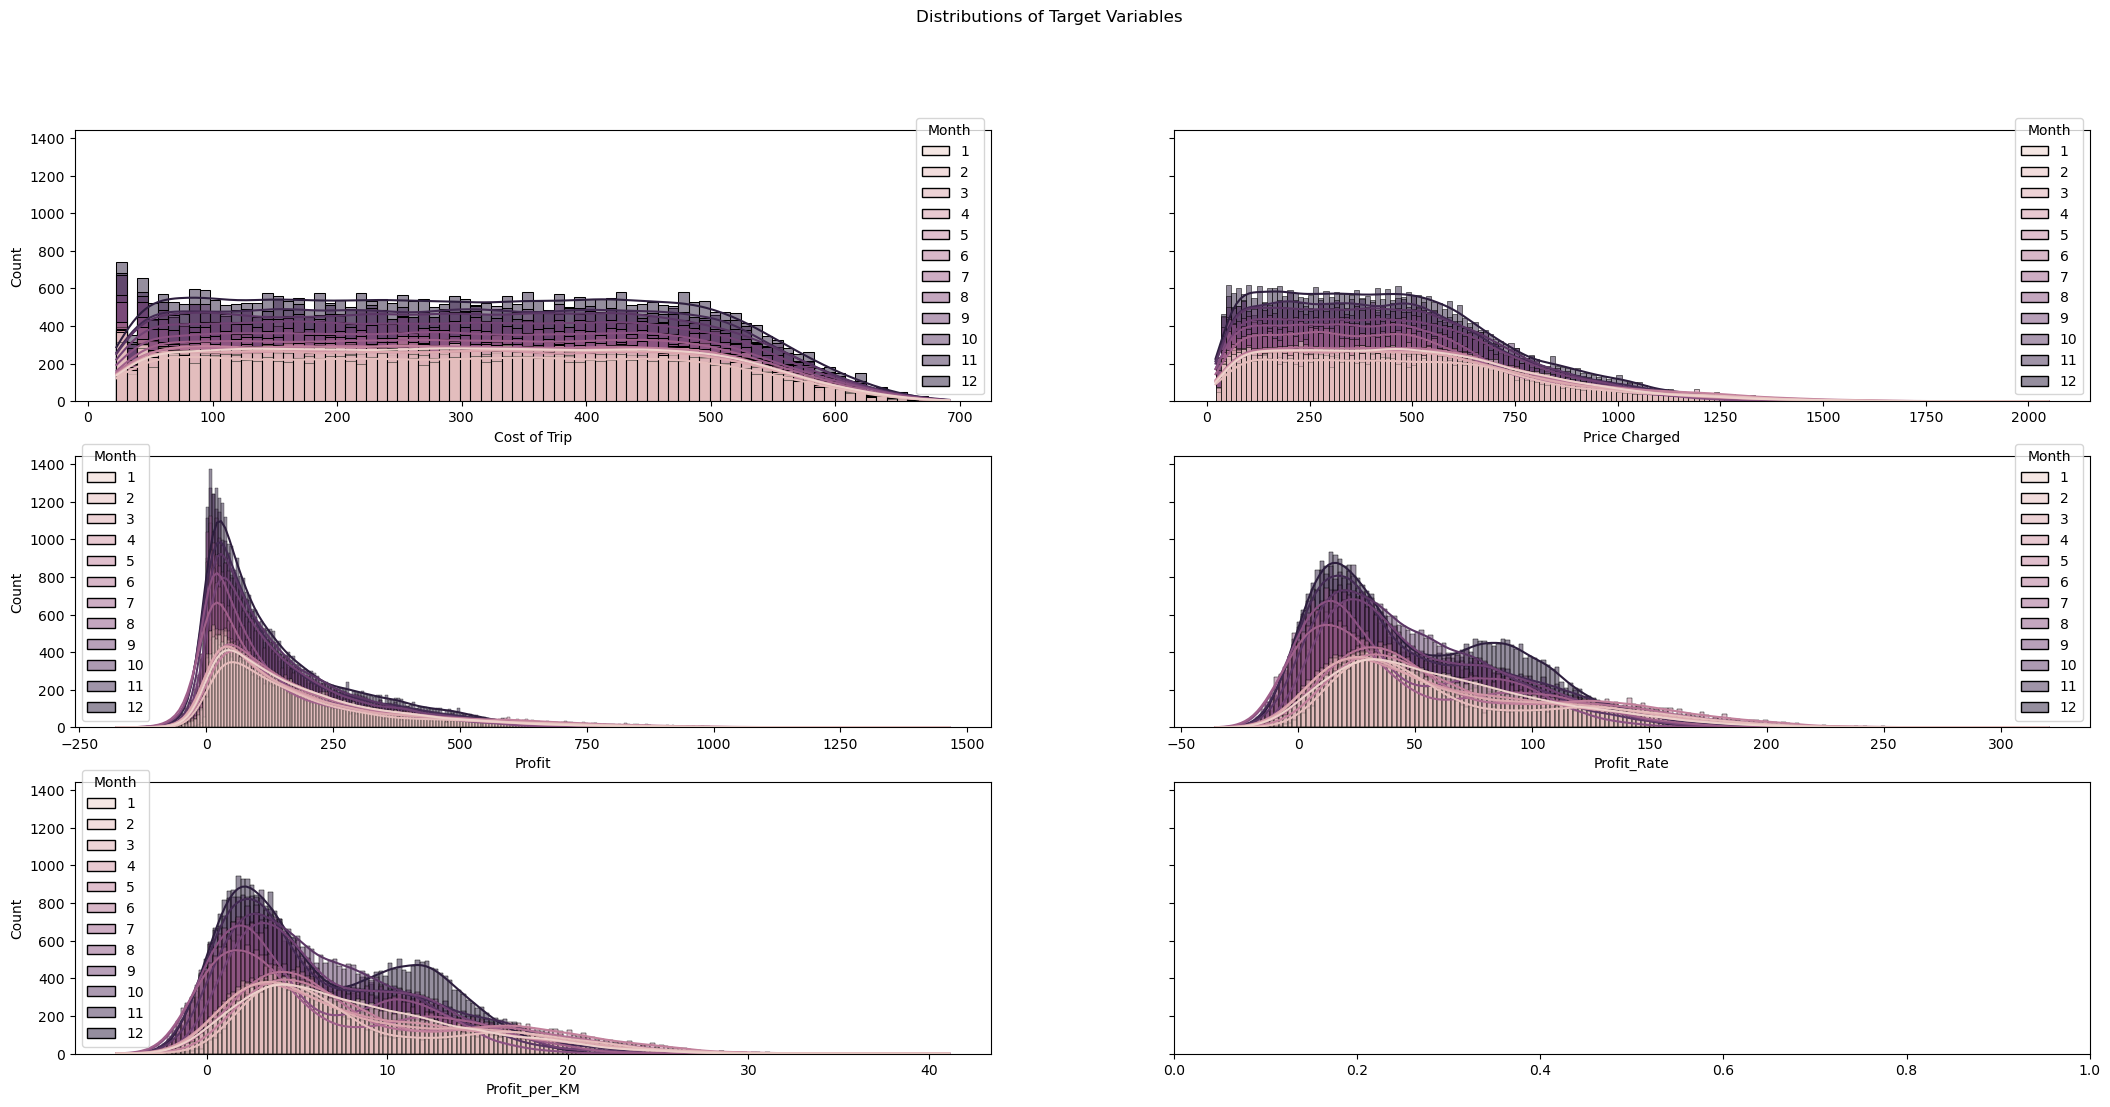

In [61]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')

sns.histplot(ax=axes[0,0], data=Yellow_cab_df, x='Cost of Trip' ,kde =True, hue="Month")
sns.histplot(ax=axes[0,1], data=Yellow_cab_df, x='Price Charged' , kde = True , hue="Month")
sns.histplot(ax=axes[1,0], data=Yellow_cab_df , x='Profit' , kde = True , hue="Month") 
sns.histplot(ax=axes[1,1], data=Yellow_cab_df , x='Profit_Rate' , kde = True , hue="Month")
sns.histplot(ax=axes[2,0], data=Yellow_cab_df , x='Profit_per_KM' , kde = True , hue="Month")

Selects all columns in the DataFrame that are of type 'object' — usually string columns.

These are typically the columns that contain categorical text data.

Fits the LabelEncoder to the column's unique string values.

Transforms them into integer codes.

Overwrites the column with these new encoded values.

In [40]:
col = list(master_data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(master_data[i].unique()) > 20:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)


Categorical Features : Company City Payment_Mode Gender Population Users Holiday Year Month
Numerical Features : Transaction ID KM Travelled Price Charged Cost of Trip Customer ID Age Income (USD/Month) Profit Profit_Rate Profit_per_KM


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
data_encoded = master_data.copy(deep=True)

In [ ]:
for col in data_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    

In [ ]:
data_encoded.head()

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10, 15))
axes = ax.flatten()  # Flatten the array of axes for easy iteration

for i in range(len(categorical_features)):
    sns.countplot(
        x=categorical_features[i],
        data=data_encoded,
        hue='Company',
        palette=colors,
        edgecolor='black',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution: {categorical_features[i]}')
    axes[i].tick_params(axis='x', rotation=45)
    title = numerical_features[i] + ' vs Company'
    axes[i].legend(['Pink','Yellow'])
    plt.title(title);

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(data_encoded.corr(),cmap = colors,annot = True);


In [ ]:
corr = data_encoded.corrwith(data_encoded['Profit']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Company');


Create multiple hypothesis and investigate:

You will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.

For Example: “Is there any seasonality in number of customers using the cab service?”

Areas to investigate:

    Which company has maximum cab users at a particular time period?
    Does margin proportionally increase with increase in number of customers?
    What are the attributes of these customer segments?


In [ ]:
sns.histplot(merged_df["Users"], color='blue', kde=True, bins=20, stat='density')
plt.title('Users')
plt.xticks(rotation=45)

In [ ]:
sns.histplot(merged_df["City"], color='blue', kde=True, bins=20, stat='density')
plt.title('Cities')
plt.xticks(rotation=45)

In [ ]:
sorted_df = merged_df.sort_values(by='Users')  # or by='Users', ascending=False for reverse order

x = sorted_df["City"]
y = sorted_df["Users"]

plt.scatter(x, y, label='Users in the City', color='blue')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Users')
plt.title('Users in the City')
plt.legend()
plt.tight_layout()  # Avoid label cutoff
plt.show()
